## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [207]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [208]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [209]:
from sklearn import preprocessing
# normalize the data attributes
# normalized_X_train = preprocessing.normalize(x_train)
# normalized_X_test = preprocessing.normalize(x_test)

In [210]:
import numpy as np
# y_train = np.reshape(y_train, (-1,1))
# normalized_y_train =preprocessing.normalize(y_train)



In [211]:
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))
# normalized_y_test =preprocessing.normalize(y_test)

### let's normalize y using the max price 

In [212]:
# max_y = y_train.max()
# max_y_test = y_test.max()
# max_y_test

# y_train = y_train/max_y
# y_test = y_test/max_y

In [219]:

normalized_X_train = preprocessing.normalize(x_train)
normalized_X_test = preprocessing.normalize(x_test)

In [220]:
normalized_X_train.shape, y_train.shape, normalized_X_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

## Define Model

In [194]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility 
numpy.random.seed(42)

In [221]:
# https://keras.io/getting-started/sequential-model-guide
model = Sequential()
model.add(Dense(13, input_dim=13, activation ='relu'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='rmsprop',loss='mse', metrics=['mean_squared_error'])
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.compile(loss='mean_squared_error',
#               optimizer='sgd',
#               metrics=['mae', 'acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_89 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 11        
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


In [222]:
 history = model.fit(normalized_X_train, y_train, epochs=50)

Epoch 1/50
404/404 [==============================] - 1s 3ms/step - loss: 575.6686 - mean_squared_error: 575.6686
Epoch 2/50
404/404 [==============================] - 0s 49us/step - loss: 570.0216 - mean_squared_error: 570.0216
Epoch 3/50
404/404 [==============================] - 0s 53us/step - loss: 564.3184 - mean_squared_error: 564.3184
Epoch 4/50
404/404 [==============================] - 0s 52us/step - loss: 557.1815 - mean_squared_error: 557.1815
Epoch 5/50
404/404 [==============================] - 0s 45us/step - loss: 548.2889 - mean_squared_error: 548.2889
Epoch 6/50
404/404 [==============================] - 0s 49us/step - loss: 538.3306 - mean_squared_error: 538.3306
Epoch 7/50
404/404 [==============================] - 0s 52us/step - loss: 527.3492 - mean_squared_error: 527.3492
Epoch 8/50
404/404 [==============================] - 0s 44us/step - loss: 515.1142 - mean_squared_error: 515.1142
Epoch 9/50
404/404 [==============================] - 0s 47us/step - loss: 501.67

In [223]:
#Evaluate the model
# scores = model.evaluate(normalized_X_test, y_test)
test_mse_score, test_mae_score = model.evaluate(normalized_X_test, y_test)
print(f"{model.metrics_names[1]}: {scores[1]*1000}")
test_mse_score

102/102 [==============================] - 1s 5ms/step
mean_squared_error: 22649.067710427677


72.75972343893612

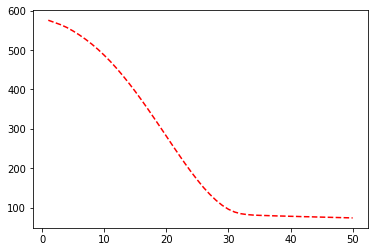

In [224]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.show();

In [225]:
history.history

{'loss': [575.6686268419322,
  570.0215695824953,
  564.3183678353187,
  557.1815079792891,
  548.288872747138,
  538.330614448774,
  527.3491760858215,
  515.1142348487779,
  501.67394928884977,
  486.8639329966932,
  470.93211440284654,
  453.5456029306544,
  435.02808281926826,
  415.42874870677986,
  394.85109325446706,
  373.30477029026144,
  351.0096928058284,
  328.0650556205523,
  304.9072685619392,
  281.4969835942334,
  257.97216555151607,
  234.93227756613553,
  212.2415359043839,
  190.6350789589457,
  170.2074510933149,
  150.91675643165513,
  133.85934584211594,
  118.64616250519705,
  105.8269007465627,
  95.84700873346613,
  88.7524204065304,
  84.56397005591062,
  82.32328815271359,
  81.06099557404471,
  80.3508479052251,
  79.8980889273162,
  79.3281381437094,
  78.83848473577216,
  78.47234555990389,
  77.94176638008344,
  77.59247264295522,
  77.0655742683033,
  76.79906992392965,
  76.3221279937442,
  75.8963175103216,
  75.49412151374439,
  75.07810611536007,
  7

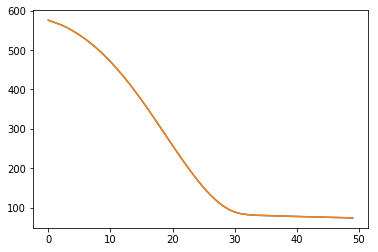

In [228]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['loss'])
# pyplot.plot(history.history['mean_absolute_percentage_error'])
# pyplot.plot(history.history['cosine_proximity'])
plt.show()

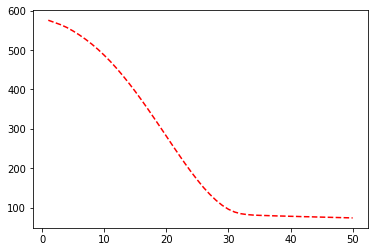

In [230]:
training_accuracy = history.history['mean_squared_error']
epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.show();

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [265]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [248]:
# Let's import again
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

In [247]:
# global hyperparameters

batch_size = 128
num_classes = 10
epochs = 20

In [235]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Flatten the images

### Let's reshape the data from 3 dimesional array to 2 dimensional

In [241]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

In [244]:
x_train.dtype, x_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

### Since the data type is unit8, let's change it to float

In [245]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Converting y numerics to catergoical classes 

In [249]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Let's normalize x_train, x_test

In [250]:
x_train /= 255
x_test /= 255

In [251]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


#### Putting it all in one place

In [266]:

batch_size = 64
num_classes = 10
epochs = 50

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Model

In [267]:
model = Sequential()
model.add(Dense(25, activation = 'relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 25)                19625     
_________________________________________________________________
dropout_13 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_109 (Dense)            (None, 20)                520       
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 16)                336       
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 10)                170       
Total para

In [268]:
history = model.fit(x_train, y_train, epochs=epochs, validation_split=.1)
scores = model.evaluate(x_test, y_test)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s 97us/step - loss: 0.8877 - acc: 0.6756 - val_loss: 0.5172 - val_acc: 0.8063
Epoch 2/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.5890 - acc: 0.7865 - val_loss: 0.4499 - val_acc: 0.8383
Epoch 3/50
54000/54000 [==============================] - 3s 65us/step - loss: 0.5289 - acc: 0.8112 - val_loss: 0.4343 - val_acc: 0.8490
Epoch 4/50
54000/54000 [==============================] - 4s 65us/step - loss: 0.4992 - acc: 0.8239 - val_loss: 0.4266 - val_acc: 0.8475
Epoch 5/50
54000/54000 [==============================] - 3s 64us/step - loss: 0.4785 - acc: 0.8321 - val_loss: 0.3995 - val_acc: 0.8613
Epoch 6/50
54000/54000 [==============================] - 3s 65us/step - loss: 0.4656 - acc: 0.8352 - val_loss: 0.3971 - val_acc: 0.8585
Epoch 7/50
54000/54000 [==============================] - 3s 65us/step - loss: 0.4505 - acc: 0.8421 - val_loss: 0.4052 - val_acc:

In [272]:
y_pred = model.predict_classes(x_test)

In [273]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [269]:
print(f'{model.metrics_names[1]}: {scores[1]*100}')

acc: 86.05000000000001


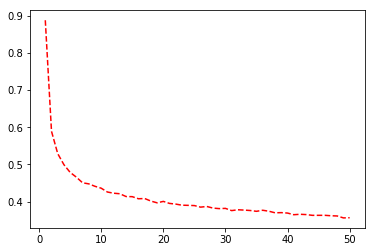

In [270]:
import matplotlib.pyplot as plt
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.show();

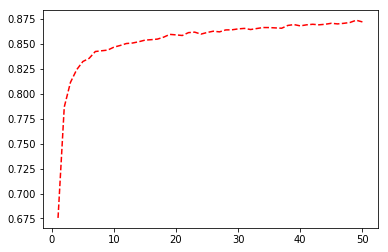

In [271]:
training_accuracy = history.history['acc']
epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.show();

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.